In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds 
import numpy as np
import matplotlib.pyplot as plt
import random 

# 데이터 불러오기 및 정규화

In [ ]:
ds_train = tfds.load('cats_vs_dogs',split='train[:80%]', as_supervised=True)
ds_test = tfds.load('cats_vs_dogs',split='train[80%:]', as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteET9IVL/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  image = tf.cast(image, tf.float32)
  image = image / 255.
  image = tf.image.resize(image, (150,150)) 
  return image, label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_train, ds_test

(<PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>)

# 모델정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax')) # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

# 모델 컴파일 & 모델 학습

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
)

Epoch 1/50
146/146 [==============================] - 13s 88ms/step - loss: 0.0329 - accuracy: 0.9876 - val_loss: 0.6918 - val_accuracy: 0.8431
Epoch 2/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0319 - accuracy: 0.9886 - val_loss: 0.6875 - val_accuracy: 0.8469
Epoch 3/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.6606 - val_accuracy: 0.8530
Epoch 4/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0323 - accuracy: 0.9878 - val_loss: 0.7123 - val_accuracy: 0.8482
Epoch 5/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0303 - accuracy: 0.9882 - val_loss: 0.7516 - val_accuracy: 0.8459
Epoch 6/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0288 - accuracy: 0.9899 - val_loss: 0.7259 - val_accuracy: 0.8463
Epoch 7/50
146/146 [==============================] - 13s 87ms/step - loss: 0.0240 - accuracy: 0.9915 - val_loss: 0.7576 - val_accuracy:

# 학습 결과 확인


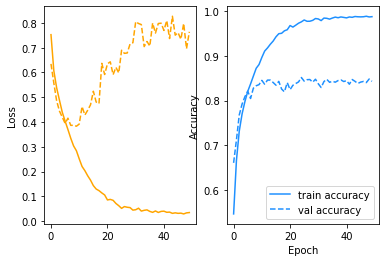

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(history.history['loss'],
         label='train loss',
         c='orange', ls='-')
ax[0].plot(history.history['val_loss'],
         label='val loss',
         c='orange',ls='--')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
ax[1].plot(history.history['val_accuracy'],
         label='val accuracy',
         c='dodgerblue', ls='--')
ax[1].set_ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# 모델 평가


In [ ]:
test_loss, test_acc = model.evaluate(ds_train)
test_loss, test_acc = model.evaluate(ds_test)



37/37 [==============================] - 1s 14ms/step - loss: 0.7643 - accuracy: 0.8431


# 결과 예측

In [ ]:
# 가장 확률이 높은 클래스 예측
pred = np.argmax(model.predict(ds_test), axis=1)
print(model.predict(ds_test))

# print('예측 결과 Shape:', pred.shape)
print('테스트 데이터셋 예측 결과 class 분류:', pred)



[[9.2520082e-01 7.4798606e-02 6.7293954e-08 ... 6.2731083e-08
  6.8619116e-08 7.1130287e-08]
 [5.1182610e-01 4.8816952e-01 5.9854108e-07 ... 7.2004337e-07
  2.9968106e-07 2.9402261e-07]
 [1.4320319e-04 9.9985683e-01 1.4456396e-10 ... 2.4405977e-10
  1.3719050e-11 1.6325776e-11]
 ...
 [7.7659592e-02 9.2231315e-01 4.0848213e-06 ... 4.5332249e-06
  2.1302226e-06 2.1231585e-06]
 [1.3678233e-01 8.6317539e-01 6.1074970e-06 ... 7.4349177e-06
  2.8465001e-06 2.9341957e-06]
 [1.9935574e-02 9.8005164e-01 2.0334946e-06 ... 2.3419493e-06
  7.7175832e-07 8.6861041e-07]]
테스트 데이터셋 예측 결과 class 분류: [0 0 1 ... 1 1 1]


In [ ]:
ds_test = tfds.load('cats_vs_dogs',split='train[80%:]', as_supervised=True)


In [ ]:
labels=[]
images=[]

for image, label in ds_test:
  l=int(label.numpy())
  labels.append(l)
  i=image.numpy().astype("uint8")
  images.append(i)

labels=np.array(labels)
print("image label list", labels)

image label list [1 0 1 ... 0 1 0]


In [ ]:
import random

예측성공
real: cat predict: cat


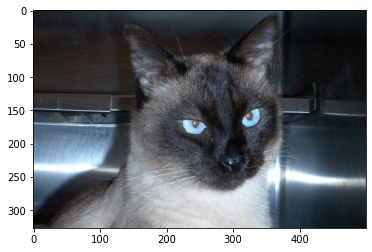

In [ ]:
class_names=['cat','dog']
test_label=random.randint(0, 4652)

real= labels[test_label]
predict= pred[test_label]
if real==predict:
  print("예측성공")

else:
  print("예측실패")

print("real:",class_names[real], "predict:", class_names[predict])

plt.imshow(images[test_label])
